In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Input

### Import Description of each Columns/ Features

In [6]:
file_description = pd.read_excel('/content/drive/MyDrive/College/AIDI 1011/MRP Project/EMS_incident_dispatch_data_description.xlsx', sheet_name=0, header=0)
file_description

Field Name  \
0                              NaN   
1                  CAD_INCIDENT_ID   
2                INCIDENT_DATETIME   
3              INITIAL_CALL_TYPE *   
4      INITIAL_SEVERITY_LEVEL_CODE   
5                FINAL_CALL_TYPE *   
6        FINAL_SEVERITY_LEVEL_CODE   
7        FIRST_ASSIGNMENT_DATETIME   
8   VALID_DISPATCH_RSPNS_TIME_INDC   
9     DISPATCH_RESPONSE_SECONDS_QY   
10       FIRST_ACTIVATION_DATETIME   
11         FIRST_ON_SCENE_DATETIME   
12  VALID_INCIDENT_RSPNS_TIME_INDC   
13    INCIDENT_RESPONSE_SECONDS_QY   
14   INCIDENT_TRAVEL_TM_SECONDS_QY   
15          FIRST_TO_HOSP_DATETIME   
16     FIRST_HOSP_ARRIVAL_DATETIME   
17         INCIDENT_CLOSE_DATETIME   
18                  HELD_INDICATOR   
19      INCIDENT_DISPOSITION_CODE    
20                         BOROUGH   
21                            ATOM   
22          INCIDENT_DISPATCH_AREA   
23                         ZIPCODE   
24                  POLICEPRECINCT   
25             CITYCOUNCILDISTRICT   
26               COMMUNITYDISTRICT   
27         COMMUNITYSCHOOLDISTRICT   
28          CONGRESSIONALDISTRICT    
29                REOPEN_INDICATOR   
30         SPECIAL_EVENT_INDICATOR   
31               STANDBY_INDICATOR   
32              TRANSFER_INDICATOR   

                                    Field Description  \
0                                                 NaN   
1   An incident identifier comprising the julian d...   
2   The date and time the incident was created in ...   
3   The call type assigned at the time of incident...   
4   The segment(priority) assigned at the time of ...   
5      The call type at the time the incident closes.   
6   The segment(priority) assigned at the time the...   
7       The date and time the first unit is assigned.   
8   Indicates that the components comprising the c...   
9   The time elapsed in seconds between the incide...   
10  The date and time the first unit gives the sig...   
11  The date and time the first unit signals that ...   
12  Indicates that the components comprising the c...   
13  The time elapsed in seconds between the incide...   
14  The time elapsed in seconds between the first_...   
15  The date and time the first unit gives the sig...   
16  The date and time the first unit signals that ...   
17  The date and time the incident closes in the d...   
18  Indicates that for some reason a unit could no...   
19  A code indicating the final outcome of the inc...   
20              The borough of the incident location.   
21  The smallest subdivision of the borough where ...   
22                 The dispatch area of the incident.   
23                      The zip code of the incident.   
24               The police precinct of the incident.   
25                         The city council district.   
26                            The community district.   
27                     The community school district.   
28                        The congressional district.   
29  Indicates that at some point the incident was ...   
30  Indicates that the incident was a special even...   
31  Indicates that the units were assigned to stan...   
32  Indicates that the incident was created for th...   

                                           Unnamed: 2  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3   Note: The call type does not reflect the actua...  
4                                                 NaN  
5   Note: The call type does not reflect the actua...  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13      

### Import list of the outcomes when an incident is completed

In [7]:
incident_diposition_code = pd.read_excel('/content/drive/MyDrive/College/AIDI 1011/MRP Project/EMS_incident_dispatch_data_description.xlsx', sheet_name=1,  header=0)
incident_diposition_code

INCIDENT DISPOSITION CODE                    Description
0                        NaN                            NaN
1                         82           transporting patient
2                         83        patient pronounced dead
3                         87                      cancelled
4                         90                      unfounded
5                         91            condition corrected
6                         92        treated not transported
7                         93            refused medical aid
8                         94        treated and transported
9                         95  triaged at scene no transport
10                        96        patient gone on arrival
11                    CANCEL                      cancelled
12                       DUP             duplicate incident
13                    NOTSNT                  unit not sent
14                    ZZZZZZ                 no disposition

### Import type of Calls 

In [8]:
call_type = pd.read_excel('/content/drive/MyDrive/College/AIDI 1011/MRP Project/EMS_incident_dispatch_data_description.xlsx', sheet_name=2, header=2)
call_type

CALL TYPE          CALL TYPE DESCRIPTION
0         NaN                            NaN
1       ABDFC   ABDOMINAL PAIN-FEVER & COUGH
2      ABDPFC   ABDOMINAL PAIN-FEVER & COUGH
3      ABDPFT    ABDOMINAL PAIN FEVER\TRAVEL
4       ABDPN                 ABDOMINAL PAIN
..        ...                            ...
264    UNKNOW  CALLER HAS NO PT MEDICAL INFO
265     VENOM            VENOM (SNAKE BITES)
266    VENOMC                         VENOMC
267     WOUND                          WOUND
268      XFER                           XFER

[269 rows x 2 columns]

### Import zipcode geo map

In [9]:
zipcode_geo_map = pd.read_csv('/content/drive/MyDrive/College/AIDI 1011/MRP Project/zipcode_geo_map.csv')
zipcode_geo_map

ZIP        LAT         LNG
0        601  18.180555  -66.749961
1        602  18.361945  -67.175597
2        603  18.455183  -67.119887
3        606  18.158345  -66.932911
4        610  18.295366  -67.125135
...      ...        ...         ...
33139  99923  56.002315 -130.041026
33140  99925  55.550204 -132.945933
33141  99926  55.138352 -131.470424
33142  99927  56.239062 -133.457924
33143  99929  56.370751 -131.693301

[33144 rows x 3 columns]

### Import Actual Data

In [10]:
data = pd.read_csv('/content/drive/MyDrive/College/AIDI 1011/MRP Project/ems-incident-dispatch-data - Copy_0.csv', index_col=0, parse_dates=True)
data.head(10)

INCIDENT_DATETIME INITIAL_CALL_TYPE  \
CAD_INCIDENT_ID                                              
202134231        2020-07-31T23:59:51.000               UNC   
202134230        2020-07-31T23:59:50.000               UNC   
202134229        2020-07-31T23:59:27.000            MVAINJ   
202134228        2020-07-31T23:58:54.000              SICK   
202134226        2020-07-31T23:58:43.000               EDP   
202134225        2020-07-31T23:58:02.000               EDP   
202134224        2020-07-31T23:57:57.000            UNKNOW   
202134223        2020-07-31T23:57:51.000             OTHER   
202134222        2020-07-31T23:56:52.000              SICK   
202134221        2020-07-31T23:56:24.000            INJURY   

                 INITIAL_SEVERITY_LEVEL_CODE FINAL_CALL_TYPE  \
CAD_INCIDENT_ID                                                
202134231                                  2             UNC   
202134230                                  2             UNC   
202134229                                  4          MVAINJ   
202134228                                  6            SICK   
202134226                                  7            EDPC   
202134225                                  7             EDP   
202134224                                  4          ALTMEN   
202134223                                  6           OTHER   
202134222                                  6            SICK   
202134221                                  5          INJURY   

                 FINAL_SEVERITY_LEVEL_CODE FIRST_ASSIGNMENT_DATETIME  \
CAD_INCIDENT_ID                                                        
202134231                                2   2020-08-01T00:00:19.000   
202134230                                2   2020-08-01T00:00:15.000   
202134229                                4   2020-07-31T23:59:38.000   
202134228                                6   2020-08-01T00:00:30.000   
202134226                                7   2020-07-31T23:59:17.000   
202134225                                7   2020-07-31T23:58:40.000   
202134224                                3   2020-07-31T23:58:06.000   
202134223                                6   2020-08-01T00:27:05.000   
202134222                                6   2020-07-31T23:59:17.000   
202134221                                5   2020-07-31T23:56:54.000   

                VALID_DISPATCH_RSPNS_TIME_INDC  DISPATCH_RESPONSE_SECONDS_QY  \
CAD_INCIDENT_ID                                                                
202134231                                    Y                            28   
202134230                                    Y                            25   
202134229                                    Y                            11   
202134228                                    Y                            96   
202134226                                    Y                            34   
202134225                                    Y                            38   
202134224                                    Y                             9   
202134223                                    Y                          1754   
202134222                                    Y                           145   
202134221                                    Y                            30   

                FIRST_ACTIVATION_DATETIME  FIRST_ON_SCENE_DATETIME  \
CAD_INCIDENT_ID                                                      
202134231         2020-08-01T00:00:34.000  2020-08-01T00:05:59.000   
202134230         2020-08-01T00:00:22.000  2020-08-01T00:06:06.000   
202134229         2020-07-31T23:59:49.000  2020-08-01T00:10:35.000   
202134228         2020-08-01T00:00:38.000  2020-08-01T00:09:43.000   
202134226         2020-07-31T23:59:30.000  2020-08-01T00:10:27.000   
202134225         2020-07-31T23:58:53.000  2020-08-01T00:06:08.000   
202134224         2020-07-31T23:58:17.000  2020-08-01T00:03:08.000   
202134223         2020-08-01T00:27:27.000  2020-08-01

In [11]:
data.dtypes

INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ACTIVATION_DATETIME          object
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
FIRST_TO_HOSP_DATETIME             object
FIRST_HOSP_ARRIVAL_DATETIME        object
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 

In [12]:
#shape of dataset
data.shape

(100000, 30)

In [13]:
#checking for missing values
data.isnull().sum() * 100 / len(data)

INCIDENT_DATETIME                  0.000
INITIAL_CALL_TYPE                  0.000
INITIAL_SEVERITY_LEVEL_CODE        0.000
FINAL_CALL_TYPE                    0.000
FINAL_SEVERITY_LEVEL_CODE          0.000
FIRST_ASSIGNMENT_DATETIME          0.255
VALID_DISPATCH_RSPNS_TIME_INDC     0.000
DISPATCH_RESPONSE_SECONDS_QY       0.000
FIRST_ACTIVATION_DATETIME          0.397
FIRST_ON_SCENE_DATETIME            2.522
VALID_INCIDENT_RSPNS_TIME_INDC     0.000
INCIDENT_RESPONSE_SECONDS_QY       2.522
INCIDENT_TRAVEL_TM_SECONDS_QY      2.522
FIRST_TO_HOSP_DATETIME            40.157
FIRST_HOSP_ARRIVAL_DATETIME       40.546
INCIDENT_CLOSE_DATETIME            0.000
HELD_INDICATOR                     0.000
INCIDENT_DISPOSITION_CODE          0.343
BOROUGH                            0.000
INCIDENT_DISPATCH_AREA             0.000
ZIPCODE                            1.366
POLICEPRECINCT                     1.360
CITYCOUNCILDISTRICT                1.360
COMMUNITYDISTRICT                  1.360
COMMUNITYSCHOOLD

There are some fields that have empty value
- **39.2%** of FIRST_TO_HOSP_DATETIME (The date and time the first unit gives the signal that it is enroute to the hospital.)
- **39.6%** of FIRST_HOSP_ARRIVAL_DATETIME (The date and time the first unit signals that it has arrived at the hospital.)
- **0.093%** of COMMUNITYSCHOOLDISTRICT (The community school district.)
- **0.097%** of FIRST_ACTIVATION_DATETIME (The date and time the first unit gives the signal that it is enroute to the location of the incident.)

Lets drop all the null rows for now

In [14]:
to_drop = ['FIRST_TO_HOSP_DATETIME', 'FIRST_HOSP_ARRIVAL_DATETIME', 'COMMUNITYSCHOOLDISTRICT',  'FIRST_ACTIVATION_DATETIME']

data.drop(to_drop, axis=1,  inplace=True)
data.reset_index()

CAD_INCIDENT_ID        INCIDENT_DATETIME INITIAL_CALL_TYPE  \
0            202134231  2020-07-31T23:59:51.000               UNC   
1            202134230  2020-07-31T23:59:50.000               UNC   
2            202134229  2020-07-31T23:59:27.000            MVAINJ   
3            202134228  2020-07-31T23:58:54.000              SICK   
4            202134226  2020-07-31T23:58:43.000               EDP   
...                ...                      ...               ...   
99995        201871834  2020-07-05T09:50:24.000            UNKNOW   
99996        201871833  2020-07-05T09:50:14.000            DIFFBR   
99997        201871832  2020-07-05T09:49:34.000              SICK   
99998        201871831  2020-07-05T09:48:49.000            INJURY   
99999        201871829  2020-07-05T09:48:14.000               UNC   

       INITIAL_SEVERITY_LEVEL_CODE FINAL_CALL_TYPE  FINAL_SEVERITY_LEVEL_CODE  \
0                                2             UNC                          2   
1                                2             UNC                          2   
2                                4          MVAINJ                          4   
3                                6            SICK                          6   
4                                7            EDPC                          7   
...                            ...             ...                        ...   
99995                            4          UNKNOW                          4   
99996                            2          DIFFBR                          2   
99997                            6            SICK                          6   
99998                            5          INJURY                          5   
99999                            2             UNC                          2   

      FIRST_ASSIGNMENT_DATETIME VALID_DISPATCH_RSPNS_TIME_INDC  \
0       2020-08-01T00:00:19.000                              Y   
1       2020-08-01T00:00:15.000                              Y   
2       2020-07-31T23:59:38.000                              Y   
3       2020-08-01T00:00:30.000                              Y   
4       2020-07-31T23:59:17.000                              Y   
...                         ...                            ...   
99995   2020-07-05T09:50:39.000                              Y   
99996   2020-07-05T09:50:49.000                              Y   
99997   2020-07-05T09:49:42.000                              Y   
99998   2020-07-05T09:48:58.000                              Y   
99999   2020-07-05T09:48:14.000                              Y   

       DISPATCH_RESPONSE_SECONDS_QY  FIRST_ON_SCENE_DATETIME  \
0                                28  2020-08-01T00:05:59.000   
1                                25  2020-08-01T00:06:06.000   
2                                11  2020-08-01T00:10:35.000   
3                                96  2020-08-01T00:09:43.000   
4                                34  2020-08-01T00:10:27.000   
...                             ...                      ...   
99995                            15  2020-07-05T09:59:52.000   
99996                            35  2020-07-05T09:54:12.000   
99997                             8                      NaN   
99998                             9  2020-07-05T09:52:36.000   
99999                             0  2020-07-05T09:48:14.000   

      VALID_INCIDENT_RSPNS_TIME_INDC  INCIDENT_RESPONSE_SECONDS_QY  \
0                                  Y                         368.0   
1                                  Y                         376.0   
2                                  Y                         668.0   
3                                  Y                         649.0   
4                                  Y                         704.0   
...                              ...                           ...   
99995                              Y                         568.0   
99996                              Y                         238.0   
99997        

In [15]:
#dropping rows with missing values
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

INCIDENT_DATETIME                 0
INITIAL_CALL_TYPE                 0
INITIAL_SEVERITY_LEVEL_CODE       0
FINAL_CALL_TYPE                   0
FINAL_SEVERITY_LEVEL_CODE         0
FIRST_ASSIGNMENT_DATETIME         0
VALID_DISPATCH_RSPNS_TIME_INDC    0
DISPATCH_RESPONSE_SECONDS_QY      0
FIRST_ON_SCENE_DATETIME           0
VALID_INCIDENT_RSPNS_TIME_INDC    0
INCIDENT_RESPONSE_SECONDS_QY      0
INCIDENT_TRAVEL_TM_SECONDS_QY     0
INCIDENT_CLOSE_DATETIME           0
HELD_INDICATOR                    0
INCIDENT_DISPOSITION_CODE         0
BOROUGH                           0
INCIDENT_DISPATCH_AREA            0
ZIPCODE                           0
POLICEPRECINCT                    0
CITYCOUNCILDISTRICT               0
COMMUNITYDISTRICT                 0
CONGRESSIONALDISTRICT             0
REOPEN_INDICATOR                  0
SPECIAL_EVENT_INDICATOR           0
STANDBY_INDICATOR                 0
TRANSFER_INDICATOR                0
dtype: int64

Now we have a clean dataset, next we deal with the data types

In [17]:
#data[['INCIDENT_DATE', 'INCIDENT_TIME']] = data['INCIDENT_DATETIME'].str.split('T', expand=True)

Splitting Data into Features and Target


In [18]:
data.head()

INCIDENT_DATETIME INITIAL_CALL_TYPE  \
CAD_INCIDENT_ID                                              
202134231        2020-07-31T23:59:51.000               UNC   
202134230        2020-07-31T23:59:50.000               UNC   
202134229        2020-07-31T23:59:27.000            MVAINJ   
202134228        2020-07-31T23:58:54.000              SICK   
202134226        2020-07-31T23:58:43.000               EDP   

                 INITIAL_SEVERITY_LEVEL_CODE FINAL_CALL_TYPE  \
CAD_INCIDENT_ID                                                
202134231                                  2             UNC   
202134230                                  2             UNC   
202134229                                  4          MVAINJ   
202134228                                  6            SICK   
202134226                                  7            EDPC   

                 FINAL_SEVERITY_LEVEL_CODE FIRST_ASSIGNMENT_DATETIME  \
CAD_INCIDENT_ID                                                        
202134231                                2   2020-08-01T00:00:19.000   
202134230                                2   2020-08-01T00:00:15.000   
202134229                                4   2020-07-31T23:59:38.000   
202134228                                6   2020-08-01T00:00:30.000   
202134226                                7   2020-07-31T23:59:17.000   

                VALID_DISPATCH_RSPNS_TIME_INDC  DISPATCH_RESPONSE_SECONDS_QY  \
CAD_INCIDENT_ID                                                                
202134231                                    Y                            28   
202134230                                    Y                            25   
202134229                                    Y                            11   
202134228                                    Y                            96   
202134226                                    Y                            34   

                 FIRST_ON_SCENE_DATETIME VALID_INCIDENT_RSPNS_TIME_INDC  \
CAD_INCIDENT_ID                                                           
202134231        2020-08-01T00:05:59.000                              Y   
202134230        2020-08-01T00:06:06.000                              Y   
202134229        2020-08-01T00:10:35.000                              Y   
202134228        2020-08-01T00:09:43.000                              Y   
202134226        2020-08-01T00:10:27.000                              Y   

                 INCIDENT_RESPONSE_SECONDS_QY  INCIDENT_TRAVEL_TM_SECONDS_QY  \
CAD_INCIDENT_ID                                                                
202134231                               368.0                          340.0   
202134230                               376.0                          351.0   
202134229                               668.0                          657.0   
202134228                               649.0                          553.0   
202134226                               704.0                          670.0   

                 INCIDENT_CLOSE_DATETIME HELD_INDICATOR  \
CAD_INCIDENT_ID                                           
202134231        2020-08-01T01:07:12.000              N   
202134230        2020-08-01T00:36:34.000              N   
202134229        2020-08-01T00:24:43.000              N   
202134228        2020-08-01T01:21:34.000              N   
202134226        2020-08-01T00:55:27.000              N   

                 INCIDENT_DISPOSITION_CODE    BOROUGH INCIDENT_DISPATCH_AREA  \
CAD_INCIDENT_ID                                                                
202134231                             82.0   BROOKLYN                     K7   
202134230                             93.0     QUEENS                     Q3   
202134229                             96.0  MANHATTAN                     M4   
202134228                             82.0   BROOKLYN                     K7   
202134226                             87.0     QUEENS                     Q2   

           

In [19]:
#data.hist(figsize= (20, 15));

In [20]:
data.dtypes

INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
CONGRESSIONALDISTRICT             float64
REOPEN_INDICATOR                   object
SPECIAL_EVENT_INDICATOR           

In [ ]:
#encoding categorical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#invoking fit_transform method on object
data['INITIAL_CALL_TYPE']=le.fit_transform(data['INITIAL_CALL_TYPE'])
data['FINAL_CALL_TYPE']=le.fit_transform(data['FINAL_CALL_TYPE'])
data['VALID_DISPATCH_RSPNS_TIME_INDC']=le.fit_transform(data['VALID_DISPATCH_RSPNS_TIME_INDC'])
data['VALID_INCIDENT_RSPNS_TIME_INDC']=le.fit_transform(data['VALID_INCIDENT_RSPNS_TIME_INDC'])
data['HELD_INDICATOR']=le.fit_transform(data['HELD_INDICATOR'])
data['BOROUGH']=le.fit_transform(data['BOROUGH'])
data['INCIDENT_DISPATCH_AREA']=le.fit_transform(data['INCIDENT_DISPATCH_AREA'])
data['REOPEN_INDICATOR']=le.fit_transform(data['REOPEN_INDICATOR'])
data['SPECIAL_EVENT_INDICATOR']=le.fit_transform(data['SPECIAL_EVENT_INDICATOR'])
data['STANDBY_INDICATOR']=le.fit_transform(data['STANDBY_INDICATOR'])
data['TRANSFER_INDICATOR']=le.fit_transform(data['TRANSFER_INDICATOR'])


In [ ]:
#Dropping Date columns
# to_drop1 = ['INCIDENT_DATETIME', 'FIRST_ON_SCENE_DATETIME', 'FIRST_ASSIGNMENT_DATETIME',  'INCIDENT_CLOSE_DATETIME']

# data.drop(to_drop1, axis=1,  inplace=True)
# data.reset_index()

CAD_INCIDENT_ID  INITIAL_CALL_TYPE  INITIAL_SEVERITY_LEVEL_CODE  \
0            202134231                 88                            2   
1            202134230                 88                            2   
2            202134229                 55                            4   
3            202134228                 72                            6   
4            202134226                 31                            7   
...                ...                ...                          ...   
96165        201871835                 29                            4   
96166        201871834                 90                            4   
96167        201871833                 26                            2   
96168        201871831                 44                            5   
96169        201871829                 88                            2   

       FINAL_CALL_TYPE  FINAL_SEVERITY_LEVEL_CODE  \
0                  102                          2   
1                  102                          2   
2                   64                          4   
3                   81                          6   
4                   33                          7   
...                ...                        ...   
96165               30                          4   
96166              104                          4   
96167               26                          2   
96168               45                          5   
96169              102                          2   

       VALID_DISPATCH_RSPNS_TIME_INDC  DISPATCH_RESPONSE_SECONDS_QY  \
0                                   0                            28   
1                                   0                            25   
2                                   0                            11   
3                                   0                            96   
4                                   0                            34   
...                               ...                           ...   
96165                               0                             6   
96166                               0                            15   
96167                               0                            35   
96168                               0                             9   
96169                               0                             0   

       VALID_INCIDENT_RSPNS_TIME_INDC  INCIDENT_RESPONSE_SECONDS_QY  \
0                                   0                         368.0   
1                                   0                         376.0   
2                                   0                         668.0   
3                                   0                         649.0   
4                                   0                         704.0   
...                               ...                           ...   
96165                               0                         203.0   
96166                               0                         568.0   
96167                               0                         238.0   
96168                               0                         227.0   
96169                               0                           0.0   

       INCIDENT_TRAVEL_TM_SECONDS_QY  HELD_INDICATOR  \
0                              340.0               0   
1                              351.0               0   
2                              657.0               0   
3                              553.0               0   
4                              670.0               0   
...                              ...             ...   
96165                          197.0               0   
96166                          553.0               0   
96167                          203.0               0   
96168                          218.0               0   
96169                            0.0               0   

       INCIDENT_DISPOSITION_CODE  BOROUGH  INCIDENT_DISPATCH_AREA  ZIPCODE  \
0                       

In [21]:
data.dtypes

INCIDENT_DATETIME                  object
INITIAL_CALL_TYPE                  object
INITIAL_SEVERITY_LEVEL_CODE         int64
FINAL_CALL_TYPE                    object
FINAL_SEVERITY_LEVEL_CODE           int64
FIRST_ASSIGNMENT_DATETIME          object
VALID_DISPATCH_RSPNS_TIME_INDC     object
DISPATCH_RESPONSE_SECONDS_QY        int64
FIRST_ON_SCENE_DATETIME            object
VALID_INCIDENT_RSPNS_TIME_INDC     object
INCIDENT_RESPONSE_SECONDS_QY      float64
INCIDENT_TRAVEL_TM_SECONDS_QY     float64
INCIDENT_CLOSE_DATETIME            object
HELD_INDICATOR                     object
INCIDENT_DISPOSITION_CODE         float64
BOROUGH                            object
INCIDENT_DISPATCH_AREA             object
ZIPCODE                           float64
POLICEPRECINCT                    float64
CITYCOUNCILDISTRICT               float64
COMMUNITYDISTRICT                 float64
CONGRESSIONALDISTRICT             float64
REOPEN_INDICATOR                   object
SPECIAL_EVENT_INDICATOR           

In [ ]:
features_names = ["INITIAL_CALL_TYPE", "INITIAL_SEVERITY_LEVEL_CODE", "FINAL_CALL_TYPE", "FINAL_SEVERITY_LEVEL_CODE", "VALID_DISPATCH_RSPNS_TIME_INDC",
                  "DISPATCH_RESPONSE_SECONDS_QY", "VALID_INCIDENT_RSPNS_TIME_INDC", "INCIDENT_RESPONSE_SECONDS_QY", "INCIDENT_TRAVEL_TM_SECONDS_QY",
                  "HELD_INDICATOR", "INCIDENT_DISPOSITION_CODE", "BOROUGH", "INCIDENT_DISPATCH_AREA", "POLICEPRECINCT", "CITYCOUNCILDISTRICT", "COMMUNITYDISTRICT", "CONGRESSIONALDISTRICT",
                  "REOPEN_INDICATIOR", "SPECIAL_EVENT_INDICATOR", "STANDBY_INDICATOR", "TRANSFER_INDICATOR"]

In [ ]:
# split data into features and target
X = data.drop("ZIPCODE", axis=1) # dropping the label variable (zipcode) from the data
y = data["ZIPCODE"]

## Modeling

In [ ]:
from sklearn import metrics # For model evaluation

from sklearn.model_selection import train_test_split # To divide the data into training and test set

In [ ]:
#splitting into 80-10-10 ratios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
pd.DataFrame(X_train).to_csv("train_features.csv", index=False)
pd.DataFrame(X_val).to_csv("val_features.csv", index=False)
pd.DataFrame(X_test).to_csv("test_features.csv", index=False)

pd.DataFrame(y_train).to_csv("train_labels.csv", index=False)
pd.DataFrame(y_val).to_csv("val_labels.csv", index=False)
pd.DataFrame(y_test).to_csv("test_labels.csv", index=False)

## Hyperparameter tuning with GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }

cv_lr = GridSearchCV(lr, parameters, cv=5)
cv_lr.fit(tr_features, tr_labels.values.ravel())

print_results(cv_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

BEST PARAMS: {'C': 1000}

0.151 (+/-0.008) for {'C': 0.001}
0.15 (+/-0.005) for {'C': 0.01}
0.15 (+/-0.011) for {'C': 0.1}
0.15 (+/-0.006) for {'C': 1}
0.153 (+/-0.009) for {'C': 10}
0.152 (+/-0.007) for {'C': 100}
0.154 (+/-0.006) for {'C': 1000}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(tr_features, tr_labels.values.ravel())

print_results(cv_rf)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.976 (+/-0.001) for {'max_depth': 2, 'n_estimators': 5}
0.976 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.976 (+/-0.001) for {'max_depth': 2, 'n_estimators': 100}
0.998 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}
0.998 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.998 (+/-0.0) for {'max_depth': 10, 'n_estimators': 100}
0.998 (+/-0.0) for {'max_depth': 20, 'n_estimators': 5}
0.998 (+/-0.0) for {'max_depth': 20, 'n_estimators': 50}
0.998 (+/-0.0) for {'max_depth': 20, 'n_estimators': 100}
0.998 (+/-0.0) for {'max_depth': None, 'n_estimators': 5}
0.998 (+/-0.0) for {'max_depth': None, 'n_estimators': 50}
0.998 (+/-0.0) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
import joblib
joblib.dump(cv_rf.best_estimator_, 'RF_model.pkl')
joblib.dump(cv_lr.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [ ]:
models = {}

for mdl in ['LR', 'RF']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [ ]:
from time import time

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    MSE = round(mean_squared_error(labels, pred), 3)
    MAE = round(mean_absolute_error(labels, pred), 3)
    r2Score = round(r2_score(labels, pred), 3)
    print('{} -- MSE: {} / MAE: {} / R2_Score: {} / RMSE: {} / Latency: {}ms'.format(name,
                                                                                   MSE,
                                                                                   MAE,
                                                                                   r2Score, 
                                                                                   np.sqrt(MSE),
                                                                                   round((end - start)*1000, 1)))

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- MSE: 28447.755 / MAE: 46.74 / R2_Score: 0.905 / RMSE: 168.66462284664203 / Latency: 22.8ms
RF -- MSE: 500.299 / MAE: 7.337 / R2_Score: 0.998 / RMSE: 22.367364619015802 / Latency: 68.3ms


In [ ]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)
evaluate_model('Logistic Regression', models['LR'], te_features, te_labels)

Random Forest -- MSE: 556.244 / MAE: 7.393 / R2_Score: 0.998 / RMSE: 23.584825630052897 / Latency: 59.0ms
Logistic Regression -- MSE: 31342.164 / MAE: 49.729 / R2_Score: 0.895 / RMSE: 177.03718253519514 / Latency: 21.5ms


In [ ]:
lr_model = LogisticRegression(C=100)
lr_model.fit(tr_features, tr_labels.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

                           feature    importance
8    INCIDENT_TRAVEL_TM_SECONDS_QY  4.870965e-03
7     INCIDENT_RESPONSE_SECONDS_QY  3.529404e-03
2                  FINAL_CALL_TYPE  3.234603e-03
0                INITIAL_CALL_TYPE  2.806923e-03
12          INCIDENT_DISPATCH_AREA  1.135252e-03
10       INCIDENT_DISPOSITION_CODE  4.845664e-04
11                         BOROUGH  1.360890e-04
3        FINAL_SEVERITY_LEVEL_CODE  4.946813e-06
6   VALID_INCIDENT_RSPNS_TIME_INDC  0.000000e+00
4   VALID_DISPATCH_RSPNS_TIME_INDC  0.000000e+00
18         SPECIAL_EVENT_INDICATOR  0.000000e+00
20              TRANSFER_INDICATOR  0.000000e+00
19               STANDBY_INDICATOR -5.465695e-07
9                   HELD_INDICATOR -2.931185e-06
17               REOPEN_INDICATIOR -6.435483e-06
1      INITIAL_SEVERITY_LEVEL_CODE -5.211717e-05
16           CONGRESSIONALDISTRICT -1.078284e-04
5     DISPATCH_RESPONSE_SECONDS_QY -1.341561e-03
14             CITYCOUNCILDISTRICT -3.304995e-03
13                  

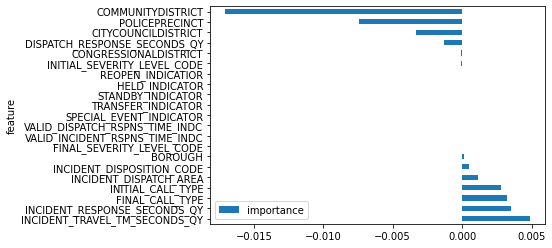

In [ ]:
#checking the feature importance for top features in logistic regression
feature_importance = pd.DataFrame(features_names, columns = ["feature"])
feature_importance["importance"] = lr_model.coef_[0]
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()


                                     feature
COMMUNITYDISTRICT               4.163053e-01
CITYCOUNCILDISTRICT             3.904391e-01
POLICEPRECINCT                  1.322882e-01
BOROUGH                         5.878082e-02
CONGRESSIONALDISTRICT           4.278627e-04
DISPATCH_RESPONSE_SECONDS_QY    3.519132e-04
INCIDENT_RESPONSE_SECONDS_QY    3.165743e-04
INCIDENT_TRAVEL_TM_SECONDS_QY   3.162984e-04
INCIDENT_DISPATCH_AREA          1.822946e-04
FINAL_CALL_TYPE                 1.536164e-04
INITIAL_CALL_TYPE               1.495808e-04
INCIDENT_DISPOSITION_CODE       1.095709e-04
INITIAL_SEVERITY_LEVEL_CODE     9.420007e-05
FINAL_SEVERITY_LEVEL_CODE       7.107397e-05
REOPEN_INDICATIOR               1.156372e-05
HELD_INDICATOR                  1.318335e-06
STANDBY_INDICATOR               7.694294e-07
VALID_INCIDENT_RSPNS_TIME_INDC  0.000000e+00
VALID_DISPATCH_RSPNS_TIME_INDC  0.000000e+00
SPECIAL_EVENT_INDICATOR         0.000000e+00
TRANSFER_INDICATOR              0.000000e+00


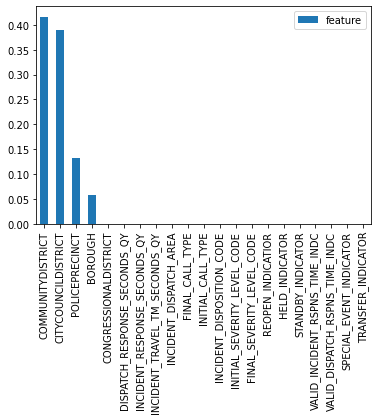

In [ ]:
#checking the feature importance for top features in random forest
rf = RandomForestRegressor(max_depth=20, n_estimators=100)
 
model = rf.fit(tr_features, tr_labels.values.ravel())
feat_importances = pd.DataFrame(model.feature_importances_, features_names, columns=["feature"])
feat_importances.sort_values(by=['feature'], ascending=False, inplace=True)

print(feat_importances)
feat_importances.plot(kind='bar')

OTHER MODELLING with TPOT

In [ ]:
#1.1 - Install Linux Dependencies & Module
!sudo apt-get install build-essential swig
!pip install TPOT
!pip install dask==2021.6.2 dask-glm==0.2.0 dask-ml==1.0.0
!pip install distributed==2021.6.2
!pip install cloudpickle==1.5.0
!pip install dask distributed --upgrade
!pip install tornado==5.1.0
!pip install xgboost==1.1.0
!pip install pipelineprofiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (458 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.1.0
    Uninstalling cloudpickle-2.1.0:
      Successfully uninstalled cloudpickle-2.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached dask-2022.2.0-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 837 kB 37.3 MB/s 
     |████████████████████████████████| 596 kB 47.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: dask
    Found existing installation: dask 2021.6.2
    Uninstalling dask-2021.6.2:
      Successfully uninstalled dask-2021.6.2
  Attempting uninstall: distributed
    Found existing installation: distributed 2021.6.2
    Uninstalling distributed-2021.6.2:
      Successfully uninstalled distributed-2021.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516 kB 34.6 MB/s 
  Created wheel for tornado: filename=tornado-5.1-cp37-cp37m-linux_x86_64.whl size=462833 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 9.9 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.1
    Uninstalling xgboost-1.6.1:
      Successfully uninstalled xgboost-1.6.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 20.2 MB/s 


In [ ]:
from tpot import TPOTRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
NSAMPLES = 50000
NFEATURES = 22
SEED = 12

X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [ ]:
# TPOT setup
GENERATIONS = 5
POP_SIZE = 100
CV = 5

tpot = TPOTRegressor(
    generations=GENERATIONS,
    population_size=POP_SIZE,
    random_state=SEED,
    n_jobs=1, 
    cv=CV,
    verbosity=2,
    max_time_mins=10
)

tpot.fit(X_train, y_train)

preds = tpot.predict(X_test)
print(r2_score(y_test, preds))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.14 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=ls, max_depth=8, max_features=0.4, min_samples_leaf=2, min_samples_split=18, n_estimators=100, subsample=0.45)
0.9980483663582932


In [ ]:
#4.7 - Export best model
tpot.export('tpot_regression_cuml_pipeline.py')
print(tpot.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=12)

# Average CV score on the training set was: -534.6612185044762
exported_pipeline = GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="ls", max_depth=8, max_features=0.4, min_samples_leaf=2, min_samples_split=18, n_estimators=100, subsample=0.45)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 12)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict